In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
import xesmf as xe
import importlib
importlib.reload(xe)

<module 'xesmf' from '/Users/zhuangjw/Research/Computing/ESMPy-xarray/xESMF/xesmf/__init__.py'>

# build regridder

In [3]:
ds_in = xe.util.grid_global(5, 4)
ds_out = xe.util.grid_global(2, 2)
ds_out

<xarray.Dataset>
Dimensions:  (x: 180, x_b: 181, y: 90, y_b: 91)
Coordinates:
    lon      (y, x) float64 -179.0 -177.0 -175.0 -173.0 -171.0 -169.0 -167.0 ...
    lat      (y, x) float64 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 ...
    lon_b    (y_b, x_b) int64 -180 -178 -176 -174 -172 -170 -168 -166 -164 ...
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90 ...
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*

In [4]:
ds_in.rename(dict(x='x_new'))

<xarray.Dataset>
Dimensions:  (x_b: 73, x_new: 72, y: 45, y_b: 46)
Coordinates:
    lon      (y, x_new) float64 -177.5 -172.5 -167.5 -162.5 -157.5 -152.5 ...
    lat      (y, x_new) float64 -88.0 -88.0 -88.0 -88.0 -88.0 -88.0 -88.0 ...
    lon_b    (y_b, x_b) int64 -180 -175 -170 -165 -160 -155 -150 -145 -140 ...
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90 ...
Dimensions without coordinates: x_b, x_new, y, y_b
Data variables:
    *empty*

In [5]:
regridder = xe.Regridder(ds_in.rename(dict(x='x_new')), 
                         ds_out.rename(dict(x='x_new')), 
                         'conservative', reuse_weights=True)

Reuse existing file: conservative_45x72_90x180.nc


In [6]:
regridder

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_45x72_90x180.nc 
Reuse pre-computed weights? True 
Input grid shape:           (45, 72) 
Output grid shape:          (90, 180) 
Grid dimension name:        ('y', 'x_new') 
Boundary dimension name:    ('y_b', 'x_b') 

# Regrid 2D data

In [7]:
ds_in['data'] = xe.data.wave_smooth(ds_in['lon'], ds_in['lat'])

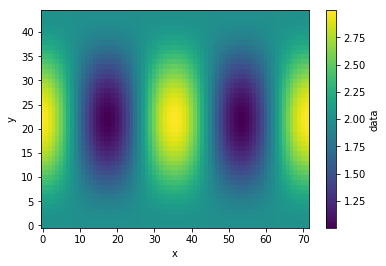

In [8]:
ds_in['data'].plot()

In [9]:
outdata = regridder(ds_in['data'])

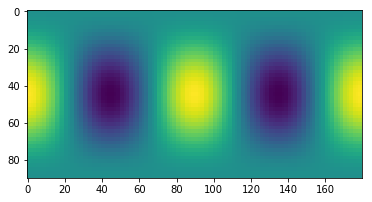

In [10]:
plt.imshow(outdata, vmax=3, vmin=1)

# Broadcast

In [11]:
extra_dims = [50, 10] # lev, time
ds_in.coords['time'] = np.arange(1, extra_dims[1]+1)
ds_in.coords['lev'] = np.arange(1, extra_dims[0]+1)
ds_in['data4D'] = ds_in['time'] * ds_in['lev'] * ds_in['data']

In [12]:
ds_in['data4D'].shape

(10, 50, 45, 72)

In [13]:
%time outdata4D = regridder(ds_in['data4D'])

CPU times: user 33.4 ms, sys: 19 ms, total: 52.3 ms
Wall time: 52.2 ms


In [14]:
outdata4D.shape

(10, 50, 90, 180)

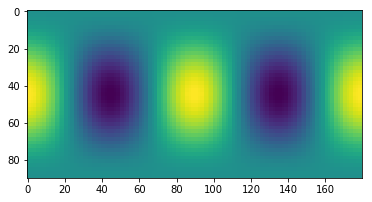

In [15]:
plt.imshow(outdata4D[0,0,:,:])

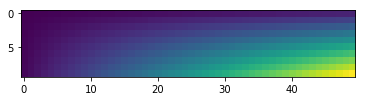

In [16]:
plt.imshow(outdata4D[:,:,10,10])